# HOTEL BOOKINGS PROJECT

# 1.00 Introduction

Boooking cancellation is a  big challenge being faced by hotels management. Frequent cancellation may affect the revenue of the hotel and its general reputation among customers.  

# 2.00 Aim and Objectives

### I. Aim

To develop a model will predict whether a hotel room booking will be cancelled

### II. Objectives

I. To select the best model for the classification project.

II. To visualize the relationship among the various features in the dataset.

# 3.00 Data Collection and Preparation

### I. Importing Libraries and Modules

In [ ]:
# importing various modules, libries and classes essential to this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### II. Data Importation

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# importing the dataset using the read_csv function
data = '/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv'

# reading file into dataframe
df = pd.read_csv(data)

# 4.00 Initial Data Inspection

Preliminary inspection of the dataset is carried-out. it is done to have an initial insight into the data before the deeper exploratory data analysis.

### I.  Dataset Overview

In [ ]:
# Displaying the dataset head
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Displaying information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Displaying sample of the Dataset
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
38564,Resort Hotel,0,194,2017,July,29,17,1,4,2,...,No Deposit,240.0,NaN,0,Transient,151.5,0,1,Check-Out,2017-07-22
118907,City Hotel,0,457,2017,August,34,25,0,2,2,...,No Deposit,6.0,NaN,0,Transient-Party,122.4,0,1,Check-Out,2017-08-27
59117,City Hotel,1,279,2016,October,43,21,0,2,2,...,Non Refund,1.0,NaN,0,Transient,65.0,0,0,Canceled,2016-09-20


### II. Discriptive statistics of the Dataset

In [ ]:
# Displaying the descriptive statics of the  Dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### III. Checking for Duplicates in the Dataset

In [ ]:
# checking for duplicates
df.duplicated().sum()

31994


### IV. Checking for Missing Values in the Dataset

In [ ]:
# Displaying missing values in the Dataset
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


### V. Other Characteristics of the Dataset

In [ ]:
# Displaying the value counts of 'income'
df['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


In [ ]:
 # Displaying the value counts of 'workclass'
df['hotel'].value_counts()

,count
hotel,
City Hotel,79330
Resort Hotel,40060


# 5.00 Exploratory Data Analysis (EDA)

### I. General Information on the Dataset

In [ ]:
# Displaying information on the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Displaying the shape of the Dataset
df.shape

(119390, 32)

In [ ]:
# Displaying the Data types of the Dataset
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [ ]:
# Displaying the size of the Dataset
df.size

3820480

### II. Discriptive statistics

In [ ]:
# Displaying the descriptive statistics of the Dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### III. Checking for Class imbalances in the Dataset

The presence of class imbalance has been detected. with <=50k having 37155 while >50k has only 11687.

In [ ]:
df['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


### IV. Insights from the Dataset

1. Booking cancellation by hotel type

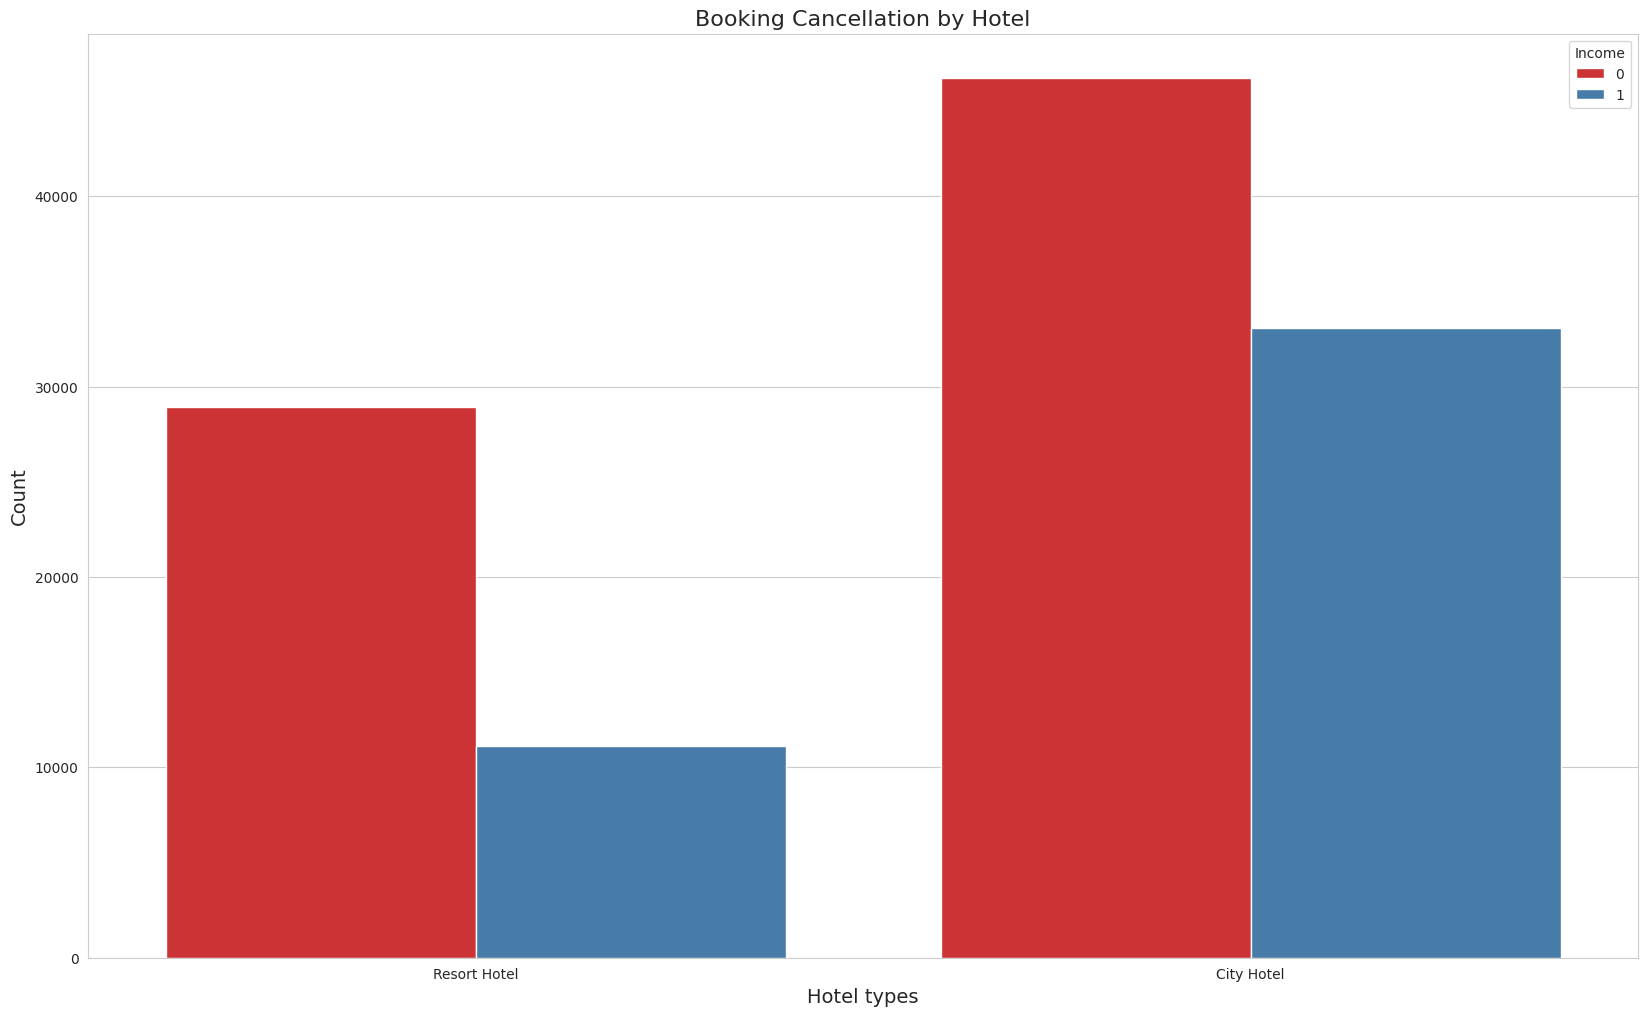

In [ ]:
# 1. Income Distribution by Education Level
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette='Set1')
plt.title('Booking Cancellation by Hotel', fontsize=16)
plt.xlabel('Hotel types', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income')
plt.show()

2. Booking cancellation by Days in the Waiting List

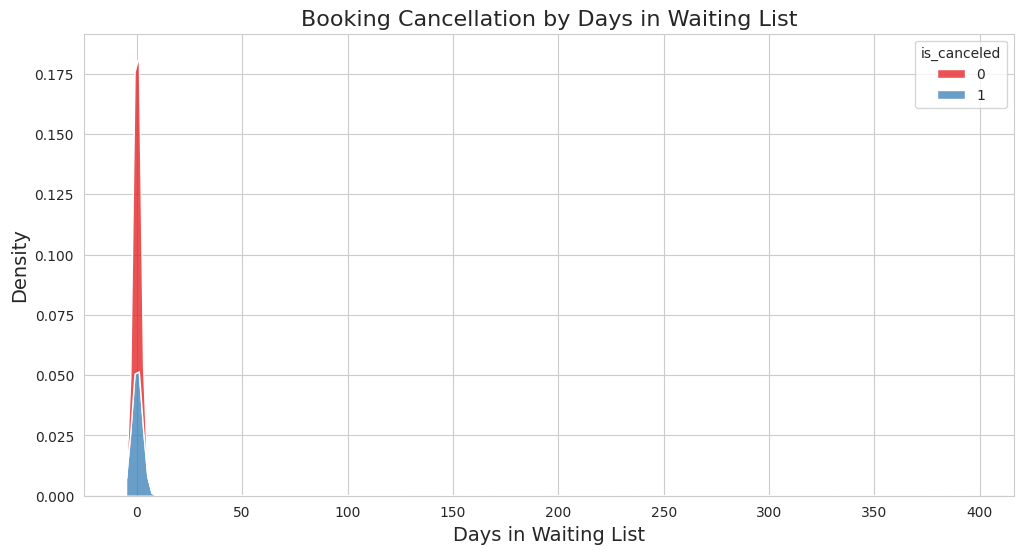

In [ ]:
# 2. Income Distribution by Age
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='days_in_waiting_list', hue='is_canceled', multiple='stack', palette='Set1')
plt.title('Booking Cancellation by Days in Waiting List', fontsize=16)
plt.xlabel('Days in Waiting List', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()
plt.show()

# 6.00 Data Preprocessing and Feature Engineeering

### II. Handling Missing Values

In [ ]:
# Displaying missing values in the dataset
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# instantiating simpleimputer
imputer = SimpleImputer(strategy='most_frequent')

# fitting and transforming the features concerned
df[['country', 'agent', 'company', 'children']] = imputer.fit_transform(df[['country', 'agent', 'company', 'children']])

In [ ]:
# Verifying the imputer process
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


### III. Handling Duplicates in the Dataset

In [ ]:
# Checking for Duplicates in the Dataset
df.duplicated().sum()

32014

In [ ]:
# Dropping Duplicates
df = df.drop_duplicates()

In [ ]:
# Verifying the drop duplicates process
df.duplicated().sum()

0

### IV. Seperation of Dataset into Features (X) and Label (y)

In [ ]:
# Seperating dataset into features (X)
X = df.drop(['is_canceled'], axis=1)

# Seperating dataset into label (y)
y = df['is_canceled']

### V. Encoding Categorical Variables

 Encoding Features (X)

In [ ]:
# Instantiating OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# columns to encode
cat_features = df.select_dtypes(exclude=np.number).columns.tolist()

# fit and transforming the features
encoded_features = encoder.fit_transform(X[cat_features])

# Creating dataframe for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns= encoder.get_feature_names_out(cat_features))

# Resetting the index of the new dataframe of encoded features
encoded_df.reset_index(drop=True, inplace=True)

# Resetting the index of X
X.reset_index(drop=True, inplace=True)

# Concatnating the encoded dataframe and X
df_encoded = pd.concat([X.drop(cat_features, axis=1), encoded_df], axis=1)

# Passing the new marged dataframe to X
X = df_encoded

# Displaying X
display(X)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,342,2015,27,1,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,737,2015,27,1,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2015,27,1,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,2015,27,1,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,2015,27,1,0,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87371,23,2017,35,30,2,5,2,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
87372,102,2017,35,31,2,5,3,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87373,34,2017,35,31,2,5,2,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87374,109,2017,35,31,2,5,2,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection

In [ ]:
selector = VarianceThreshold(threshold=.2)

In [ ]:
features_new = selector.fit_transform(X,y)

### VI. Features Scaling

In [ ]:
# instantiating standardscaler
scaler = StandardScaler()

# fit and transforming (y)
scaled_X = scaler.fit_transform(X)

# Creating dataframe for the scaled features
X = pd.DataFrame(scaled_X, columns= X.columns)

# Displaying X
display(X)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,3.045644,-1.763927,0.011685,-1.676924,-0.974253,-1.278503,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
1,7.635727,-1.763927,0.011685,-1.676924,-0.974253,-1.278503,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
2,-0.847210,-1.763927,0.011685,-1.676924,-0.974253,-0.791573,-1.398129,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
3,-0.777488,-1.763927,0.011685,-1.676924,-0.974253,-0.791573,-1.398129,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
4,-0.765867,-1.763927,0.011685,-1.676924,-0.974253,-0.304643,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87371,-0.661283,1.151020,0.596763,1.605571,0.963806,1.156146,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,73.891813,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
87372,0.256734,1.151020,0.596763,1.718761,0.963806,1.156146,1.794296,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,71.685178,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
87373,-0.533458,1.151020,0.596763,1.718761,0.963806,1.156146,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,71.685178,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
87374,0.338077,1.151020,0.596763,1.718761,0.963806,1.156146,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,71.685178,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784


### Features Scaling


In [ ]:
# instantiating standardscaler
scaler = StandardScaler()

# fit and transforming (y)
scaled_X = scaler.fit_transform(X)

# Creating dataframe for the scaled features
X = pd.DataFrame(scaled_X, columns= X.columns)

# Displaying X
display(X)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,3.045644,-1.763927,0.011685,-1.676924,-0.974253,-1.278503,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
1,7.635727,-1.763927,0.011685,-1.676924,-0.974253,-1.278503,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
2,-0.847210,-1.763927,0.011685,-1.676924,-0.974253,-0.791573,-1.398129,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
3,-0.777488,-1.763927,0.011685,-1.676924,-0.974253,-0.791573,-1.398129,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
4,-0.765867,-1.763927,0.011685,-1.676924,-0.974253,-0.304643,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87371,-0.661283,1.151020,0.596763,1.605571,0.963806,1.156146,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,73.891813,-0.013950,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
87372,0.256734,1.151020,0.596763,1.718761,0.963806,1.156146,1.794296,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,71.685178,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
87373,-0.533458,1.151020,0.596763,1.718761,0.963806,1.156146,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,71.685178,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784
87374,0.338077,1.151020,0.596763,1.718761,0.963806,1.156146,0.198083,-0.095299,-0.201677,-0.082398,...,-0.028517,-0.020018,-0.015505,-0.013533,71.685178,-0.006766,-0.008287,-0.006766,-0.003383,-0.004784


### VII. Dimensionality Reduction

In [ ]:
# instantiating Principal Component Analysis (PCA)
pca = PCA(n_components=0.95) # to retain 95% variance after features reduction.

# fitting (X)
pca.fit(X)

PCA(n_components=0.95)

# 7.00 Model Development

### I. Train-Test-Split

In [ ]:
# Seperating X and y into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### II. Model Selection and Training

**Logistic Regression**

In [ ]:
# instantiating Logistic Regression
log_reg = LogisticRegression()

# fitting the training datasets
log_reg.fit(X_train, y_train)

# testing the model
log_pred = log_reg.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, log_pred))
print(f1_score(y_test, log_pred))
print(accuracy_score(y_test, log_pred))
print(recall_score(y_test, log_pred))
print(precision_score(y_test, log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12708
           1       1.00      1.00      1.00      4768

    accuracy                           1.00     17476
   macro avg       1.00      1.00      1.00     17476
weighted avg       1.00      1.00      1.00     17476

1.0
1.0
1.0
1.0


# 8.00 Model Evaluation

### I. Model Testing

In [ ]:
# Instantiating the LogisticRegression using the best parameters from grid search
lr = LogisticRegression()

# fitting lr to the training dataset
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

### II. Evaluation metrics

**ROC Curve and AUC Score**

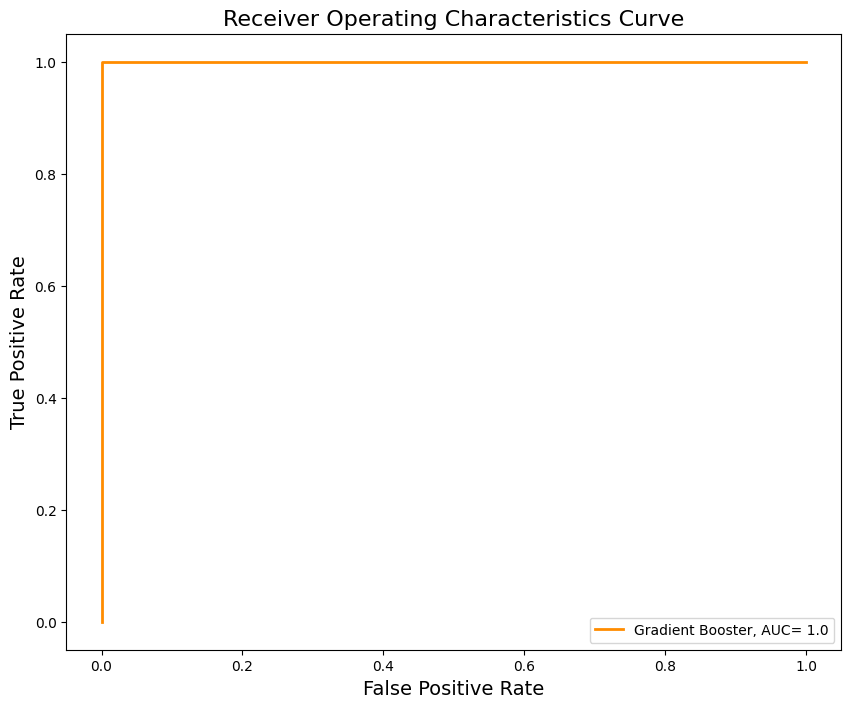

In [ ]:
# roc curve for Logistic Regression
lr_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test,lr_proba)

# auc for Logistic Regression
auc_score = auc(fpr,tpr)

#plotting roc_curve for Logistic Regression
plt.figure(figsize=(10, 8))
plt.plot(fpr,tpr, color='darkorange',lw=2, label= f"Gradient Booster, AUC= {round(auc_score,2)}")
plt.title('Receiver Operating Characteristics Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')

**Confusion Matrix**

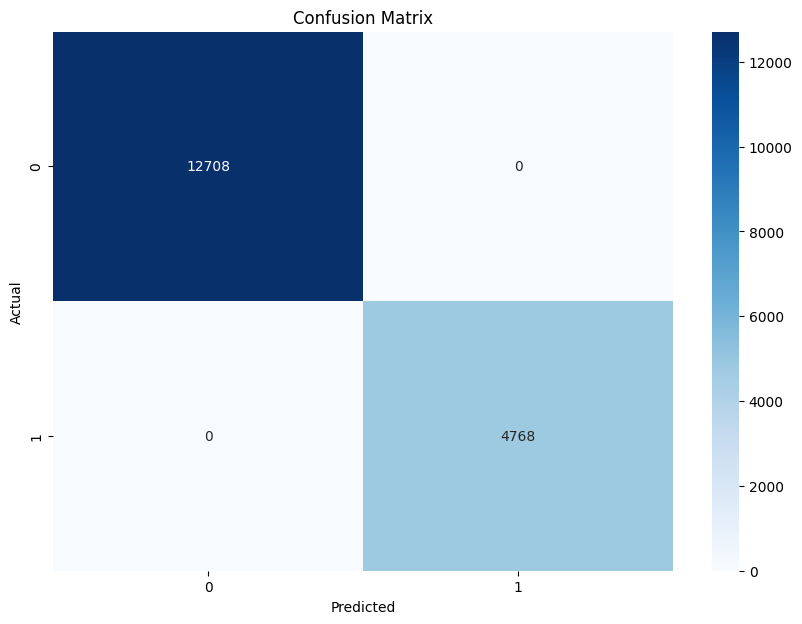

In [ ]:
# Confusion matrix for Gradient Booster
cm = confusion_matrix(y_test, lr_pred)

# Printing Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Accuracy Score**


In [ ]:
# Accuracy score for Logistic Regression
accuracy = accuracy_score(y_test,lr_pred)

# Printing accuracy score
print(f"Logistic Regression Accuracy: {round(accuracy,2)}")

Logistic Regression Accuracy: 1.0


**Precision Score**

In [ ]:
# Precision score for Logistic Regression
precision = precision_score(y_test,lr_pred)

# Printing Precision score
print(f"Logistic Regression Precision score: {round(precision,2)}")

Logistic Regression Precision score: 1.0


**F1 Score**

In [ ]:
# F1 score for Logistic Regression
f1 = f1_score(y_test,lr_pred)

# Printing F1 score
print(f"Logistic Regression F1 score: {round(f1,2)}")

Logistic Regression F1 score: 1.0


**Recall Score**

In [ ]:
# Recall score for Logistic Regression
recall = recall_score(y_test,lr_pred)

# Printing Recall score
print(f"Logistic Regression Recall score: {round(recall,2)}")

Logistic Regression Recall score: 1.0


**Classification Report**

In [ ]:
# Classification report for Logistic Regression
Class_report = classification_report(y_test,lr_pred)

# Printing Classification report
print(f"Logistic Regression Classification report: {(Class_report)}")

Logistic Regression Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12708
           1       1.00      1.00      1.00      4768

    accuracy                           1.00     17476
   macro avg       1.00      1.00      1.00     17476
weighted avg       1.00      1.00      1.00     17476



# 9.00 Conclusion

This project has achieved its objectives of developing a robust model that can generalise on a new data. Perfect accuracy of 1 shows that the model is 100% precise in its prediction.